### Install necessary packages 

In [1]:
# specified version as stablebaslines only works with version below version 2
#!pip install tensorflow-gpu==1.15.0 
#!pip install tensorflow==1.15.0

# for the different reinforcement learning algorithms
#!pip install stable-baselines
#!pip install stable-baselines3
# for the trading enivronment
#!pip install gym-anytrading
#!pip install gym 
#!pip install gym[all] -U


#!pip install finta

### Import necessary libraries

In [2]:
# needed for processing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

#needed for openai gym environment
import gym
import gym_anytrading

#needed for reinforcement learning algorithms
from stable_baselines3.common.vec_env import DummyVecEnv

from stable_baselines3 import A2C
from stable_baselines3 import DQN
from stable_baselines3 import PPO




### Load dataset

In [3]:
googl_df = pd.read_csv('GOOGL.csv')

### preprocess data

In [4]:
googl_df = googl_df.drop(columns=['Dividends', 'Stock Splits'])

In [5]:
googl_df['N_date'] = googl_df['Date'].str[:10]
googl_df['N_date'] = pd.to_datetime(googl_df['N_date'])
googl_df = googl_df.drop(columns=['Date'])

In [6]:
googl_df.rename(columns = {'N_date':'Date'}, inplace=True)
googl_df.set_index('Date', inplace=True)
googl_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,183772044


In [7]:
googl_env = gym.make('stocks-v0', df=googl_df, frame_bound=(3600,3650), window_size=5)

### random strategy - not a RL algorithm

info {'total_reward': 7.668991088867173, 'total_profit': 0.954899147328091, 'position': 1}


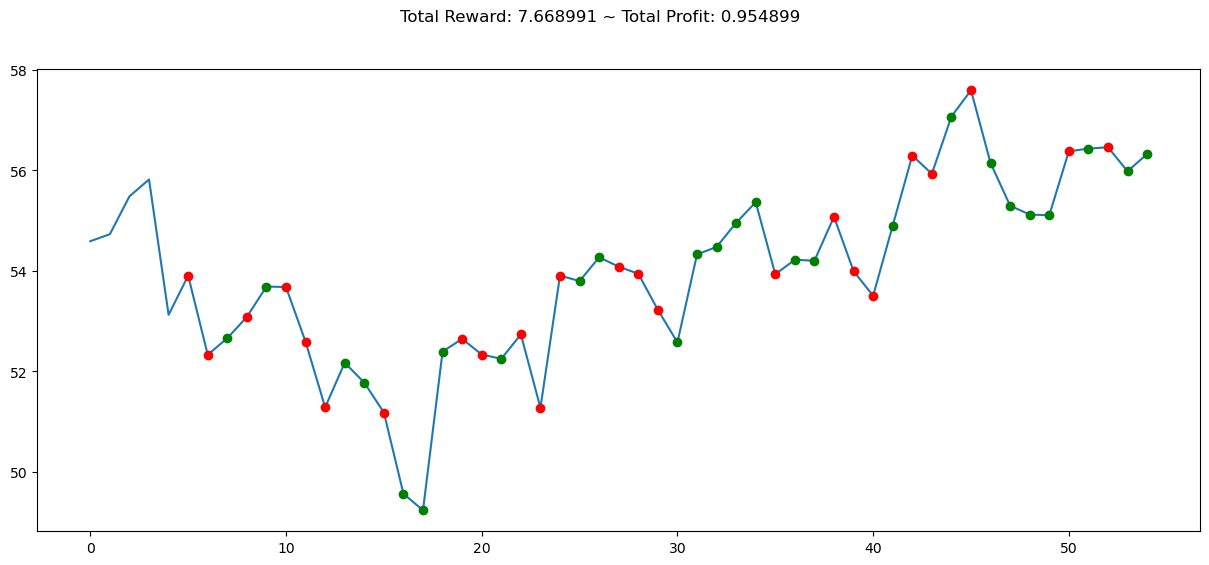

In [8]:
# follows the yt link refered to in report
# getting our signal features from the enivronment, the no.of signal features is determined by the window_size
state = googl_env.reset() #getting initial state
# loop through each step we take a random action
while True:
    # randomly buy or sell
    action = googl_env.action_space.sample()
    n_state, reward, done, info = googl_env.step(action)
    if done:
        print("info", info)
        break
random_strat_result = info['total_profit']        
plt.figure(figsize=(15,6))
plt.cla()
googl_env.render_all()
plt.show()

### Building reinfrocement algorithms

In [9]:
googl_maker = lambda: gym.make('stocks-v0', df=googl_df, frame_bound=(700,3500), window_size=5)
# can try this with other types of enivornment not just the DummyVec
googl_env = DummyVecEnv([googl_maker])

In [10]:
a2c_model = A2C('MlpPolicy', googl_env, verbose=1)
a2c_model.learn(total_timesteps=25000)

Using cpu device
-------------------------------------
| time/                 |           |
|    fps                | 540       |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.177    |
|    explained_variance | -114      |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -8.31e-05 |
|    value_loss         | 9.03e-06  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 548       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -0.347    |
|    explained_variance | -0.25     |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_loss        | -0.0004

------------------------------------
| time/                 |          |
|    fps                | 684      |
|    iterations         | 1700     |
|    time_elapsed       | 12       |
|    total_timesteps    | 8500     |
| train/                |          |
|    entropy_loss       | -0.0645  |
|    explained_variance | 0.286    |
|    learning_rate      | 0.0007   |
|    n_updates          | 1699     |
|    policy_loss        | 4.31e-05 |
|    value_loss         | 1.36e-05 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 686       |
|    iterations         | 1800      |
|    time_elapsed       | 13        |
|    total_timesteps    | 9000      |
| train/                |           |
|    entropy_loss       | -0.0308   |
|    explained_variance | -729      |
|    learning_rate      | 0.0007    |
|    n_updates          | 1799      |
|    policy_loss        | -1.54e-07 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 715      |
|    iterations         | 3300     |
|    time_elapsed       | 23       |
|    total_timesteps    | 16500    |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 7.29e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3299     |
|    policy_loss        | 0.948    |
|    value_loss         | 4.55     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 712      |
|    iterations         | 3400     |
|    time_elapsed       | 23       |
|    total_timesteps    | 17000    |
| train/                |          |
|    entropy_loss       | -0.686   |
|    explained_variance | -22.8    |
|    learning_rate      | 0.0007   |
|    n_updates          | 3399     |
|    policy_loss        | -0.249   |
|    value_loss         | 0.157    |
-

------------------------------------
| time/                 |          |
|    fps                | 712      |
|    iterations         | 4900     |
|    time_elapsed       | 34       |
|    total_timesteps    | 24500    |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | -0.00941 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4899     |
|    policy_loss        | 0.196    |
|    value_loss         | 0.209    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 713      |
|    iterations         | 5000     |
|    time_elapsed       | 35       |
|    total_timesteps    | 25000    |
| train/                |          |
|    entropy_loss       | -0.671   |
|    explained_variance | -0.0035  |
|    learning_rate      | 0.0007   |
|    n_updates          | 4999     |
|    policy_loss        | 0.6      |
|    value_loss         | 1.19     |
-

info {'total_reward': 2.6485023498535014, 'total_profit': 0.8877925353421605, 'position': 0}


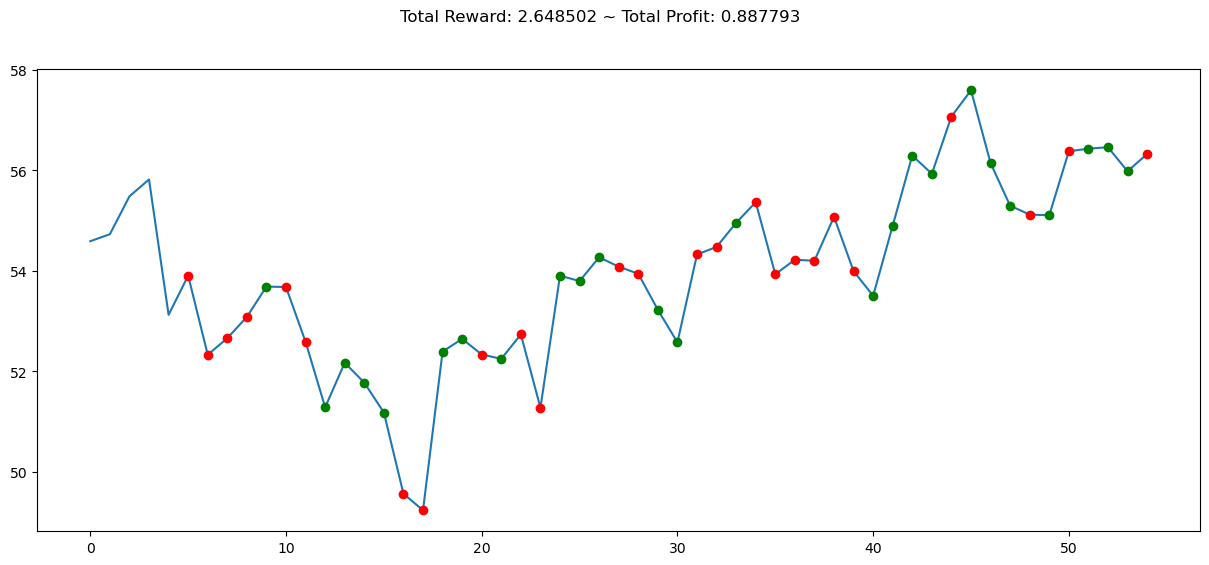

In [11]:
googl_env = gym.make('stocks-v0', df=googl_df, frame_bound=(3600,3650), window_size=5)
obs = googl_env.reset()
# used from github code refered to in report and this code is used across the project to visualiase the graph
while True:
    obs = obs[np.newaxis, ...]
    action, _states = a2c_model.predict(obs)
    obs,rewards, done, info = googl_env.step(action)
    if done:
        print('info', info)
        
        break
A2C_result = info['total_profit']
plt.figure(figsize=(15,6))
plt.cla()
googl_env.render_all()
plt.show()

In [12]:
dqn_model = DQN('MlpPolicy', googl_env, verbose=1)
dqn_model.learn(total_timesteps=25000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.34     |
|    exploration_rate | 0.926    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 16949    |
|    time_elapsed     | 0        |
|    total_timesteps  | 196      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.83     |
|    exploration_rate | 0.851    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 9421     |
|    time_elapsed     | 0        |
|    total_timesteps  | 392      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.93   

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.39     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 92       |
|    fps              | 9318     |
|    time_elapsed     | 0        |
|    total_timesteps  | 4508     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.4      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 96       |
|    fps              | 9273     |
|    time_elapsed     | 0        |
|    total_timesteps  | 4704     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.89     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 180      |
|    fps              | 9028     |
|    time_elapsed     | 0        |
|    total_timesteps  | 8820     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 2.06     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 184      |
|    fps              | 9044     |
|    time_elapsed     | 0        |
|    total_timesteps  | 9016     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.95     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 2.54     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 268      |
|    fps              | 9034     |
|    time_elapsed     | 1        |
|    total_timesteps  | 13132    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 2.54     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 272      |
|    fps              | 9051     |
|    time_elapsed     | 1        |
|    total_timesteps  | 13328    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 2.45     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.8      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 356      |
|    fps              | 8968     |
|    time_elapsed     | 1        |
|    total_timesteps  | 17444    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.79     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 360      |
|    fps              | 8996     |
|    time_elapsed     | 1        |
|    total_timesteps  | 17640    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 1.84     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 2.37     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 444      |
|    fps              | 8890     |
|    time_elapsed     | 2        |
|    total_timesteps  | 21756    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 2.37     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 448      |
|    fps              | 8856     |
|    time_elapsed     | 2        |
|    total_timesteps  | 21952    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 2.16     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

info {'total_reward': -0.08599853515625, 'total_profit': 0.9834313035952067, 'position': 0}
0.9834313035952067


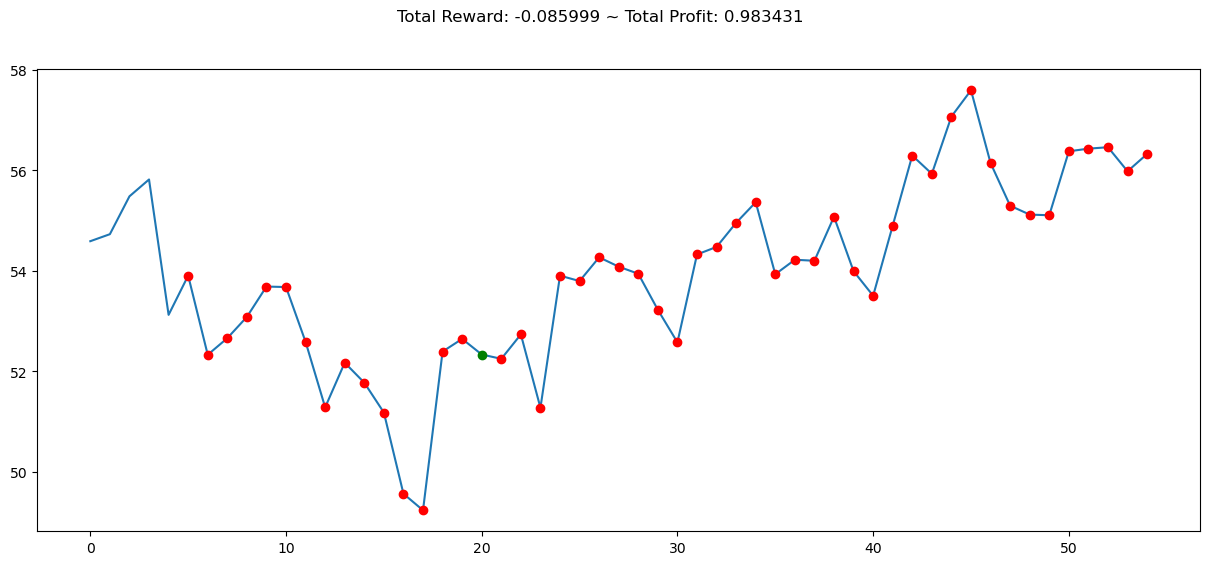

In [13]:
googl_env = gym.make('stocks-v0', df=googl_df, frame_bound=(3600,3650), window_size=5)
obs = googl_env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = dqn_model.predict(obs)
    obs,rewards, done, info = googl_env.step(action)
    if done:
        print('info', info)
        
        break
DQN_result = info['total_profit']
print(DQN_result)
plt.figure(figsize=(15,6))
plt.cla()
googl_env.render_all()
plt.show()

In [14]:
ppo_model = PPO('MlpPolicy', googl_env, verbose=1)
ppo_model.learn(total_timesteps=25000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 49       |
|    ep_rew_mean     | 2.98     |
| time/              |          |
|    fps             | 1332     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 49          |
|    ep_rew_mean          | 2.99        |
| time/                   |             |
|    fps                  | 951         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007721427 |
|    clip_fraction        | 0.057       |
|    clip_range           | 0.2         |
|    entropy_loss   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 49           |
|    ep_rew_mean          | 7.17         |
| time/                   |              |
|    fps                  | 775          |
|    iterations           | 11           |
|    time_elapsed         | 29           |
|    total_timesteps      | 22528        |
| train/                  |              |
|    approx_kl            | 0.0060646124 |
|    clip_fraction        | 0.05         |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.421       |
|    explained_variance   | 0.427        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.02         |
|    n_updates            | 100          |
|    policy_gradient_loss | -0.000148    |
|    value_loss           | 1.96         |
------------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean 

info {'total_reward': 9.866004943847663, 'total_profit': 1.0388798170010114, 'position': 1}


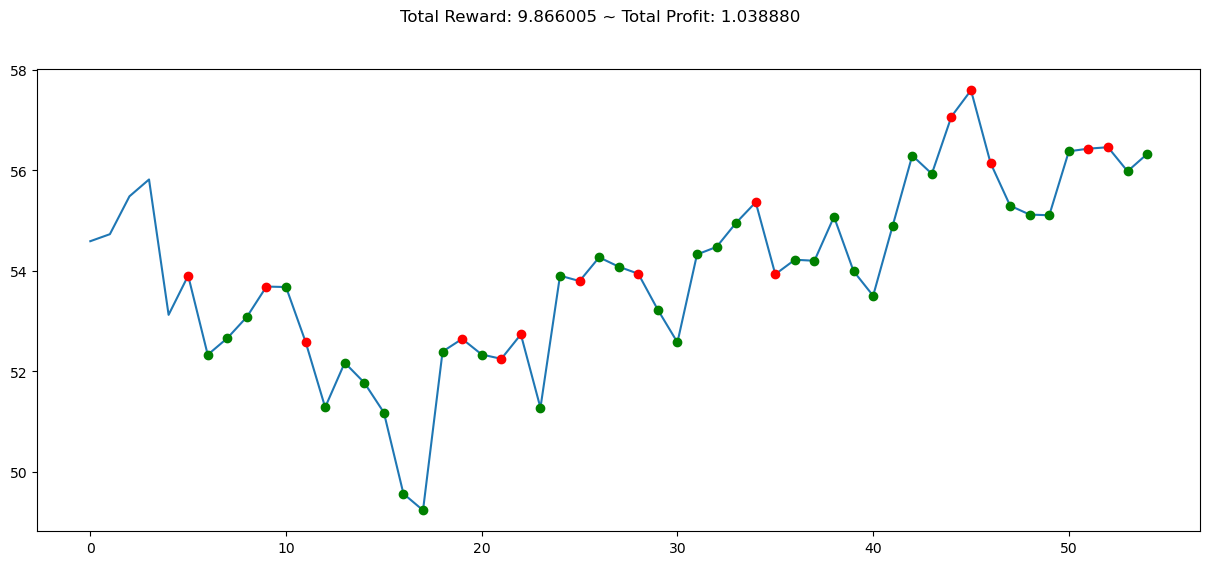

In [15]:
googl_env = gym.make('stocks-v0', df=googl_df, frame_bound=(3600,3650), window_size=5)
obs = googl_env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = ppo_model.predict(obs)
    obs,rewards, done, info = googl_env.step(action)
    if done:
        print('info', info)
        
        break
PPO_result = info['total_profit']
plt.figure(figsize=(15,6))
plt.cla()
googl_env.render_all()
plt.show()

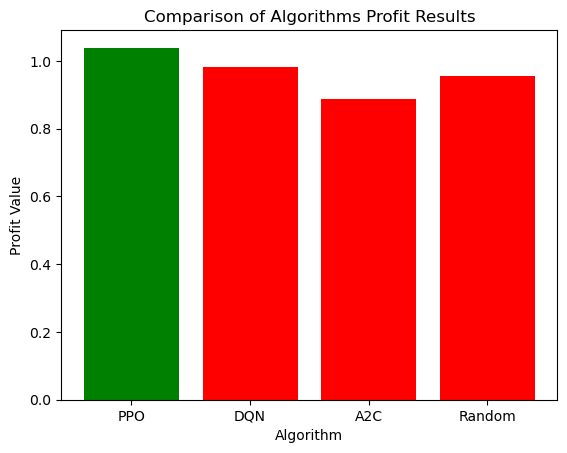

In [16]:
## viusalise result

x = ['PPO', 'DQN', 'A2C', 'Random']
y = [PPO_result, DQN_result, A2C_result, random_strat_result]
colors = ['green' if result > 1 else 'red' for result in y ]
plt.bar(x, y, color=colors)
plt.title('Comparison of Algorithms Profit Results')
plt.xlabel('Algorithm')
plt.ylabel('Profit Value')
plt.show()